# DBSCAN (Core)

**Descripción:**

En esta actividad, implementarás el algoritmo DBSCAN para detectar patrones de agrupamiento y encontrar clientes atípicos en el dataset «Wholesale Customers Data» disponible en Kaggle. DBSCAN es ideal para detectar clusters de forma arbitraria y encontrar puntos atípicos (outliers), lo que es útil en escenarios donde los datos no forman clusters esféricos como en el caso de K-means.

Enlace al dataset: https://www.kaggle.com/binovi/wholesale-customers-data



**Objetivo:**

El objetivo principal de esta actividad es aplicar el algoritmo DBSCAN para identificar clusters y clientes atípicos en el dataset. El enfoque está en comprender cómo DBSCAN maneja los outliers y su capacidad para detectar agrupamientos densos.



**Instrucciones:**

1. Carga de datos:
  – Descarga y carga el dataset de Kaggle. Realiza una exploración inicial del dataset, identificando las variables que consideras importantes para el agrupamiento.
  – El dataset contiene información sobre diferentes tipos de clientes y su comportamiento de compra, lo que incluye variables como el gasto anual en distintas categorías de productos.

2. Exploración y preprocesamiento de datos:
  – Realiza un análisis exploratorio de los datos, incluyendo un resumen estadístico de las variables. Es importante entender la distribución de los datos antes de aplicar el modelo de DBSCAN.
  – Asegúrate de estandarizar los datos antes de ejecutar DBSCAN, ya que este algoritmo es sensible a la escala de las variables.
  – Considera la posibilidad de eliminar o tratar valores atípicos que puedan afectar el rendimiento del algoritmo.

3. Aplicación de DBSCAN:
  – Implementa el algoritmo DBSCAN en el dataset. Recuerda que DBSCAN tiene dos hiperparámetros importantes: epsilon (distancia máxima para considerar dos puntos como vecinos) y min_samples (número mínimo de puntos requeridos para formar un cluster).
  – Experimenta con diferentes valores de epsilon y min_samples para obtener agrupamientos significativos. Utiliza técnicas visuales como gráficos de dispersión para evaluar los resultados obtenidos.
  – Determina cuáles son los outliers identificados por DBSCAN y visualiza cómo se distribuyen en relación con los clusters formados.

4. Visualización de clusters y outliers:
  – Visualiza los clusters formados por DBSCAN en gráficos de dispersión. Utiliza diferentes colores para representar los clusters y marca los outliers con un color distintivo para hacer visible su presencia.
  – Discute la estructura de los clusters encontrados. ¿Hay alguna correlación entre las variables y los clusters? ¿Cómo se distribuyen los outliers en comparación con los datos agrupados?

5. Interpretación de resultados:
  – Evalúa la calidad del agrupamiento. DBSCAN no requiere que se especifique el número de clusters, lo que es una ventaja cuando no se conoce esta información de antemano.
  – Discute la naturaleza de los outliers detectados. ¿Son clientes únicos con comportamientos inusuales? ¿Podrían estos clientes representar oportunidades comerciales o riesgos?



**Análisis de Resultados:**

  – En esta sección, realiza un análisis detallado de los clusters formados y de los outliers. Utiliza métricas como el «silhouette score» para evaluar la calidad del agrupamiento, aunque es importante recordar que DBSCAN no siempre forma clusters compactos, por lo que estas métricas deben interpretarse con cuidado.

  – Genera un reporte que explique los valores de epsilon y min_samples elegidos, y justifica por qué esos valores fueron adecuados para este dataset. Analiza si los clusters formados tienen sentido desde una perspectiva comercial o de comportamiento del cliente.



**Conclusión:**

  – Esta actividad tiene como objetivo principal el uso de DBSCAN para encontrar agrupamientos en datos que pueden no formar clusters bien definidos. También busca desarrollar habilidades para la detección de outliers y para el ajuste de los parámetros de un modelo no supervisado.

In [1]:
# Paso 1: Importación de librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Cargar el dataset
ruta_dataset = "../data/Wholesale customers data.csv"  # Ajusta la ruta según corresponda
df = pd.read_csv(ruta_dataset)

# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
print(df.head())

# Información general del dataset
print("\nInformación del dataset:")
print(df.info())

# Resumen estadístico de las variables
print("\nResumen estadístico:")
print(df.describe())

# Verificar valores nulos
print("\n¿Existen valores nulos?")
print(df.isnull().sum())

Primeras filas del dataset:
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Det

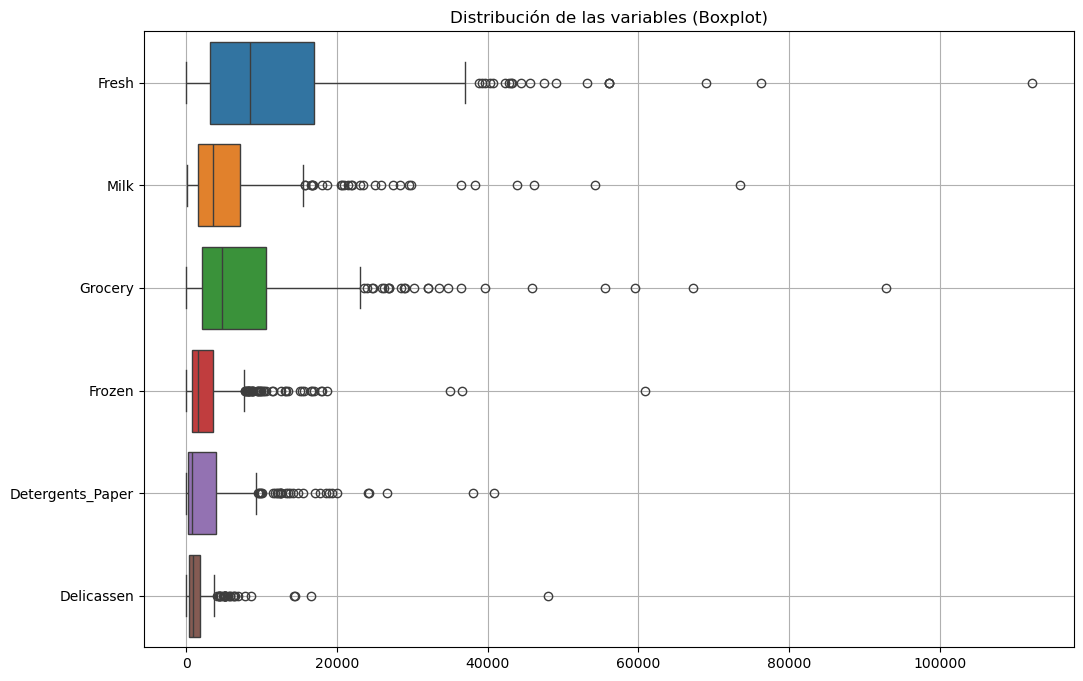


Primeras filas de las variables estandarizadas:
      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
0  0.052933  0.523568 -0.041115 -0.589367         -0.043569   -0.066339
1 -0.391302  0.544458  0.170318 -0.270136          0.086407    0.089151
2 -0.447029  0.408538 -0.028157 -0.137536          0.133232    2.243293
3  0.100111 -0.624020 -0.392977  0.687144         -0.498588    0.093411
4  0.840239 -0.052396 -0.079356  0.173859         -0.231918    1.299347


In [3]:
# Paso 2.1: Selección de características relevantes
# Seleccionamos columnas numéricas relacionadas con el comportamiento de compra
features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
X = df[features]

# Paso 2.2: Visualización inicial de las distribuciones
plt.figure(figsize=(12, 8))
sns.boxplot(data=X, orient="h")
plt.title("Distribución de las variables (Boxplot)")
plt.grid()
plt.show()

# Paso 2.3: Estandarización de los datos
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Verificar las primeras filas después de la estandarización
print("\nPrimeras filas de las variables estandarizadas:")
print(pd.DataFrame(X_scaled, columns=features).head())


In [4]:
from sklearn.cluster import DBSCAN

# Paso 3.1: Aplicar DBSCAN con valores iniciales de eps y min_samples
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Paso 3.2: Verificar clusters detectados
unique_labels = set(dbscan_labels)
print(f"Clusters detectados por DBSCAN: {unique_labels}")
print(f"Cantidad de puntos en cada cluster:\n{pd.Series(dbscan_labels).value_counts()}")

# Agregar etiquetas de clusters al DataFrame original
df['Cluster'] = dbscan_labels


Clusters detectados por DBSCAN: {0, -1}
Cantidad de puntos en cada cluster:
 0    413
-1     27
Name: count, dtype: int64


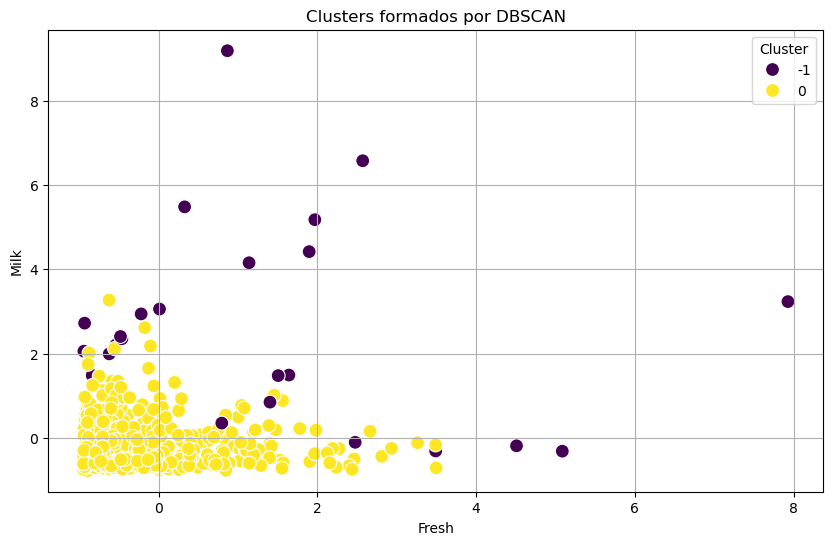


Outliers detectados por DBSCAN:
     Channel  Region   Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
23         2       3   26373  36423    22019    5154              4337   
28         2       3    4113  20484    25957    1158              8604   
45         2       3    5181  22044    21531    1740              7353   
47         2       3   44466  54259    55571    7782             24171   
61         2       3   35942  38369    59598    3254             26701   
65         2       3      85  20959    45828      36             24231   
71         1       3   18291   1266    21042    5373              4173   
85         2       3   16117  46197    92780    1026             40827   
86         2       3   22925  73498    32114     987             20070   
87         1       3   43265   5025     8117    6312              1579   
92         2       3    9198  27472    32034    3232             18906   
93         1       3   11314   3090     2062   35009                71   
103  

In [5]:
# Paso 4.1: Visualización en un gráfico de dispersión (usando las dos primeras características)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=dbscan_labels, palette="viridis", s=100)
plt.title("Clusters formados por DBSCAN")
plt.xlabel(features[0])  # 'Fresh'
plt.ylabel(features[1])  # 'Milk'
plt.grid()
plt.legend(title="Cluster")
plt.show()

# Paso 4.2: Visualización de los outliers
outliers = df[df['Cluster'] == -1]
print("\nOutliers detectados por DBSCAN:")
print(outliers)


In [6]:
from sklearn.metrics import silhouette_score

# Calcular el Silhouette Score (excluyendo outliers)
if len(set(dbscan_labels) - {-1}) >= 2:  # Asegurarse de que haya al menos 2 clusters válidos
    dbscan_silhouette = silhouette_score(X_scaled[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
    print(f"\nSilhouette Score para DBSCAN (excluyendo outliers): {dbscan_silhouette:.4f}")
else:
    print("\nDBSCAN no detectó suficientes clusters válidos para calcular el Silhouette Score.")



DBSCAN no detectó suficientes clusters válidos para calcular el Silhouette Score.



DBSCAN con eps=1.2, min_samples=5
Clusters detectados: {0, -1}
Cantidad de puntos en cada cluster:
 0    402
-1     38
Name: count, dtype: int64


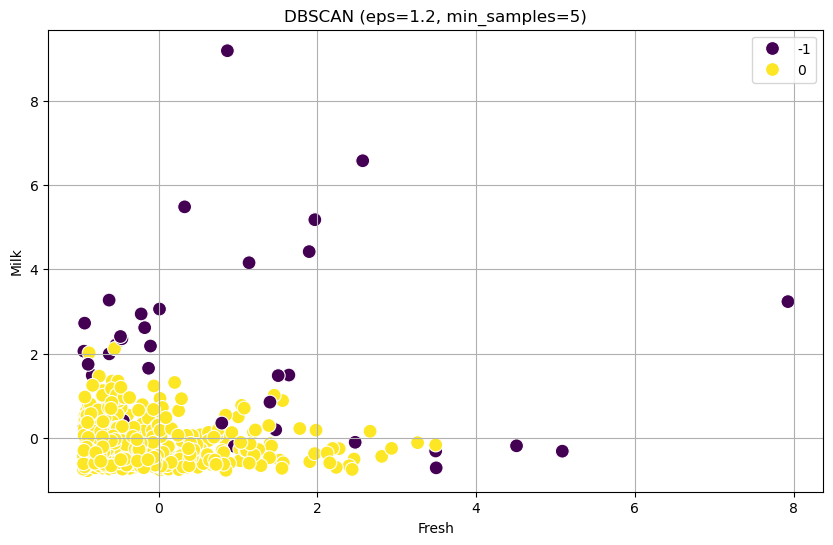


DBSCAN con eps=1.5, min_samples=10
Clusters detectados: {0, -1}
Cantidad de puntos en cada cluster:
 0    411
-1     29
Name: count, dtype: int64


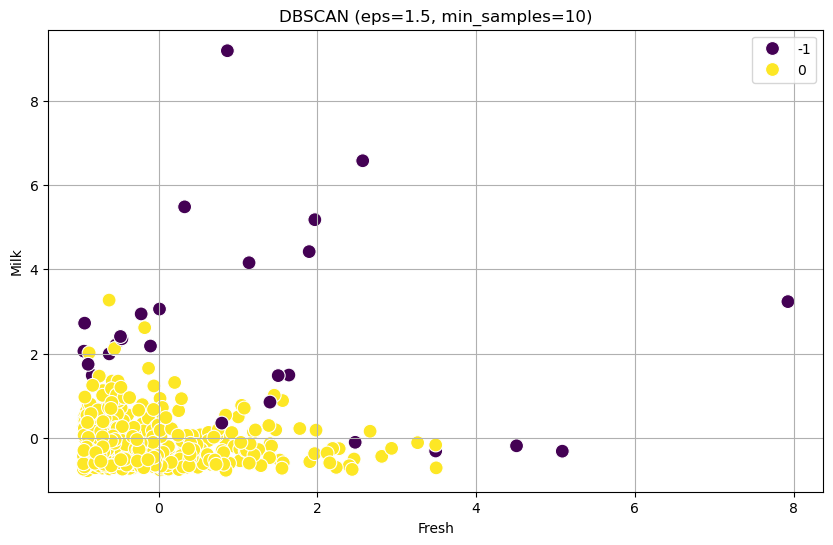


DBSCAN con eps=2.0, min_samples=5
Clusters detectados: {0, -1}
Cantidad de puntos en cada cluster:
 0    427
-1     13
Name: count, dtype: int64


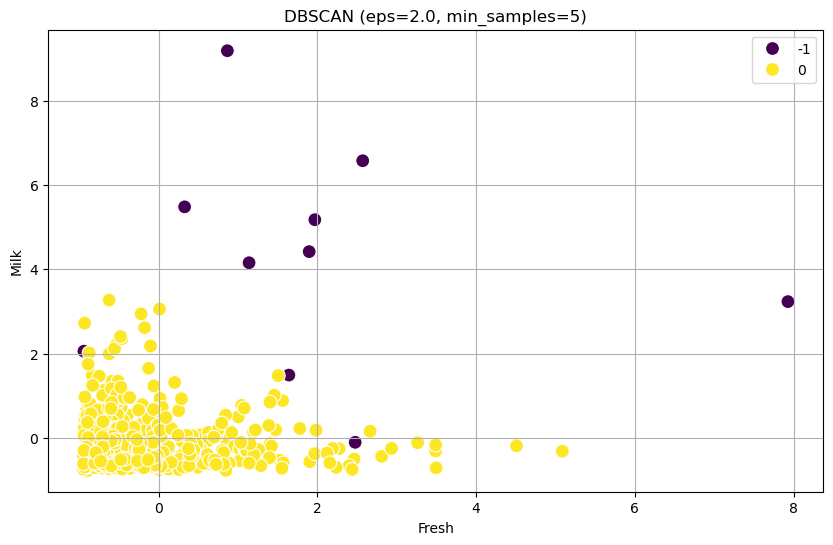

In [7]:
# Función para probar diferentes valores de eps y min_samples
def ajustar_dbscan(eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan_labels = dbscan.fit_predict(X_scaled)
    unique_labels = set(dbscan_labels)
    print(f"\nDBSCAN con eps={eps}, min_samples={min_samples}")
    print(f"Clusters detectados: {unique_labels}")
    print(f"Cantidad de puntos en cada cluster:\n{pd.Series(dbscan_labels).value_counts()}")
    
    # Visualización
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=dbscan_labels, palette="viridis", s=100)
    plt.title(f"DBSCAN (eps={eps}, min_samples={min_samples})")
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.grid()
    plt.show()

# Probar diferentes combinaciones de eps y min_samples
ajustar_dbscan(eps=1.2, min_samples=5)
ajustar_dbscan(eps=1.5, min_samples=10)
ajustar_dbscan(eps=2.0, min_samples=5)
